# INVESTIGATE A DATASET PROJECT- No Show Appointments

##  Table of Contents
    Introduction.
    Data Wrangling.
    Exploratory Data Analysis.
    Conclusions

# 1. Introduction

This project is my first project in the ALX bootcamp.
From all the projects available, I have picked the "No show appointment" a project to investigate a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

The dataset contains the following data;

PatientId; identical for each patient.

AppointmentID; identical to every scheduled appointment.

Gender; shows the patient's gender (M/F).

ScheduledDay; indicates the Date/Time the patient set up their appointment.

AppointmentDay; indicates the date/time the patient called to book their appointment.

Age; displays the ages of each patient.

Neighborhood; indicates the location of the hospital.

Scholarship; indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Hipertension; indicates whether or not the patient suffers from Hypertension.

Diabetes; indicates whether or not the patient suffers from Diabetes.

Alcoholism; indicates whether or not the patient suffers from Alcoholism.

Handcap; indicates whether or not the patient is with special needs.

SMS_received; indicates whether or not the patient has received a text message to remind them of their appointment.

Show-up; ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [55]:
#IMPORT PYTHON PACKAGES 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [56]:
#Load the dataset for the project

No_show_apt_df = pd.read_csv(r'C:\Users\ASUS\Desktop\ALX Project_1\Noshowappointment.csv')
#view the data
No_show_apt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 1.1 Asking Questions

#### Asking Questions based on the parameters in the data. On exploring my data, these are the questions I'd like to answer:
1. The percentage of shows to no-shows.
2. The rate of showing up for medical appointments based on age.
3. What gender has a better performance in showing up for their medical appointments.


# 2. Data Wrangling

In [57]:
#looking through the dataset for null values and datatype of each variable

No_show_apt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [58]:
#examining the columns, rows for missing data and incorrect entries

No_show_apt_df.dtypes #checking datatypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [59]:
# Check if there is any missing values

No_show_apt_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### 2.2 Checking for duplicates in the dataset and individual columns.

In [60]:
# Check for duplicate rows 
No_show_apt_df.duplicated().sum()

0

In [61]:
#checking for duplicates in the appointmentid column
sum(No_show_apt_df.AppointmentID.duplicated())

0

In [62]:
#checking for duplicates in the patientid column
sum(No_show_apt_df.PatientId.duplicated())

48228

In [63]:
No_show_apt_df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64

Repeated Patient ID is going to be taken as an indication that some patients had multiple appointments. To this end, our analusis will be based on the appointmentid rather than Patientid which has repeated values.

### 2.3 Incorrect Data Validation

This aspect of wrangling depends majorly on the type of data and mode of entry, we'll be looking out for missplellings, negative entries and zero values.

In [64]:
#checking for the different unique entries for gender
No_show_apt_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [65]:
#checking for unique values in the age column
No_show_apt_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [66]:
# Check to confirm the negative value in the Age column 

No_show_apt_df[No_show_apt_df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

Theoretically and practically, age should contain positive integers only except for infants whose ages are > 0 and less than 1, tho they are not integers, they are positive. We'll be dropping this particular record.

In [67]:
# Check for zero/negative PatientsId values

No_show_apt_df[No_show_apt_df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [68]:
#Check for zero/negative AppointmentID
No_show_apt_df[No_show_apt_df.AppointmentID < 0]['AppointmentID'] 

Series([], Name: AppointmentID, dtype: int64)

In [69]:
#checking for unique values in scheduledDay column
No_show_apt_df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [70]:
#checking for unique values in the neighbourhood column
No_show_apt_df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [71]:
No_show_apt_df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [72]:
#checking for unique values in the Handicap column
No_show_apt_df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [73]:
#checking for unique vales in the scholarship column
No_show_apt_df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [74]:
#checking for unique vales in the hypertension column
No_show_apt_df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [75]:
#checking for unique vales in the diabetes column
No_show_apt_df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [76]:
#checking for unique vales in the alcoholism column
No_show_apt_df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [77]:
#checking for unique vales in the sms_received column
No_show_apt_df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [78]:
#checking for unique vales in the no-show column
No_show_apt_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [79]:
#check the number of unique values in each columns

No_show_apt_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [80]:
No_show_apt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 3. Data Cleaning and Preparation

In [81]:
# Rename misspelt columns

No_show_apt_df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow']

In [82]:
#Convert AppointmentDay and ScheduledDay from String to DateTime format,
#Note that stSince the Appointment times were set to 00:00:00 in all the appointments, our analysis won't include the appointment time.
#create 2 columns for: appointment booking date and the appointment date

# Appointment Date
No_show_apt_df['AppointmentDate'] = pd.to_datetime(No_show_apt_df['AppointmentDay']).dt.date
No_show_apt_df['DayofWeek'] = pd.to_datetime(No_show_apt_df['AppointmentDay']).dt.weekday
No_show_apt_df.drop('AppointmentDay',axis=1, inplace = True)
# Appointment Booking Date
No_show_apt_df['ScheduledDate'] = pd.to_datetime(No_show_apt_df['ScheduledDay']).dt.date
No_show_apt_df.drop('ScheduledDay',axis=1, inplace = True)
No_show_apt_df.head()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,4,2016-04-29
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,4,2016-04-29


In [83]:
# Convert PatientID to integer 
No_show_apt_df['PatientID'] = (No_show_apt_df['PatientID']).astype('int64')

In [84]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 
No_show_apt_df['WaitingDuration'] = No_show_apt_df.AppointmentDate - No_show_apt_df.ScheduledDate

In [85]:
No_show_apt_df.head()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,4,2016-04-29,0 days
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29,0 days
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29,0 days
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29,0 days
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,4,2016-04-29,0 days


In [86]:
#check the number of negative waiting periods

No_show_apt_df[No_show_apt_df['WaitingDuration'] < '0 days']

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,0,2016-05-10,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,1,2016-05-18,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,2,2016-05-05,-1 days
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,3,2016-05-11,-6 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,1,2016-05-04,-1 days


In [87]:
# Exclude the 5 records with the negative waiting duration, the new dataset size is should be 5 entries lesser

No_show_apt_df = No_show_apt_df[No_show_apt_df['AppointmentDate'] >= No_show_apt_df['ScheduledDate']]
No_show_apt_df.shape

(110522, 16)

In [88]:
# Exclude the record with the negative Age value, the new dataset should be an entry lesser

No_show_apt_df = No_show_apt_df[No_show_apt_df.Age != -1]
No_show_apt_df.shape

(110521, 16)

In [89]:
# Define a new column to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
No_show_apt_df['AgeGroup'] = pd.cut(No_show_apt_df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
No_show_apt_df['AgeGroup'] = No_show_apt_df.AgeGroup.astype('category')
No_show_apt_df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

In [90]:
No_show_apt_df['WaitingDuration'] = (No_show_apt_df.AppointmentDate - No_show_apt_df.ScheduledDate).astype('timedelta64[D]').astype(int)
No_show_apt_df.head()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,AgeGroup
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,4,2016-04-29,0,60 - 79
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29,0,40 - 59
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29,0,60 - 79
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,4,2016-04-29,0,0 - 19
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,4,2016-04-29,0,40 - 59


In [91]:
#for readability and easy comprehension convert the following numerical data to categorical data

No_show_apt_df['Noshow'] = No_show_apt_df.Noshow.astype('category')
No_show_apt_df.Noshow.cat.rename_categories(['Show','NoShow'], inplace = True);
No_show_apt_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\2011461269.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  No_show_apt_df.Noshow.cat.rename_categories(['Show','NoShow'], inplace = True);


,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,AgeGroup
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Show,2016-04-29,4,2016-04-29,0,60 - 79
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Show,2016-04-29,4,2016-04-29,0,40 - 59
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,Show,2016-04-29,4,2016-04-29,0,60 - 79
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show,2016-04-29,4,2016-04-29,0,0 - 19
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Show,2016-04-29,4,2016-04-29,0,40 - 59


In [92]:
#for readability and easy comprehension convert the following numerical data to categorical data
No_show_apt_df['Gender'] = No_show_apt_df.Gender.astype('category')
No_show_apt_df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

No_show_apt_df['Scholarship'] = No_show_apt_df.Scholarship.astype('category')
No_show_apt_df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

No_show_apt_df['Hypertension'] = No_show_apt_df.Hypertension.astype('category')
No_show_apt_df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

No_show_apt_df['Diabetes'] = No_show_apt_df.Diabetes.astype('category')
No_show_apt_df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

No_show_apt_df['Alcoholism'] = No_show_apt_df.Alcoholism.astype('category')
No_show_apt_df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

No_show_apt_df['Handicap'] = No_show_apt_df.Handicap.astype('category')
No_show_apt_df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

No_show_apt_df['SMS_received'] = No_show_apt_df.SMS_received.astype('category')
No_show_apt_df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);
No_show_apt_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\3481615838.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  No_show_apt_df.Gender.cat.rename_categories(['Female','Male'], inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\3481615838.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  No_show_apt_df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\3481615838.py:9: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,AgeGroup
0,29872499824296,5642903,Female,62,JARDIM DA PENHA,No Scholarship,Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,60 - 79
1,558997776694438,5642503,Male,56,JARDIM DA PENHA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,40 - 59
2,4262962299951,5642549,Female,62,MATA DA PRAIA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,60 - 79
3,867951213174,5642828,Female,8,PONTAL DE CAMBURI,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 19
4,8841186448183,5642494,Female,56,JARDIM DA PENHA,No Scholarship,Hypertension,Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,40 - 59


# 4. Exploratory Data Analysis

As earlier stated in the introduction, these are the questions I would like to answer.

#### Asking Questions based on the parameters in the data. On exploring my data, these are the questions I'd like to answer:
1. The percentage of shows to no-shows.
2. The rate of showing up for medical appointments based on age.
3. What gender has a better performance in showing up for their medical appointments.

In [93]:
#looking to recofirm the most current state of my dataset

No_show_apt_df.head()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,AgeGroup
0,29872499824296,5642903,Female,62,JARDIM DA PENHA,No Scholarship,Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,60 - 79
1,558997776694438,5642503,Male,56,JARDIM DA PENHA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,40 - 59
2,4262962299951,5642549,Female,62,MATA DA PRAIA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,60 - 79
3,867951213174,5642828,Female,8,PONTAL DE CAMBURI,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 19
4,8841186448183,5642494,Female,56,JARDIM DA PENHA,No Scholarship,Hypertension,Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,40 - 59


In [94]:
#creating a function for bar plots

def bar_plot_func(No_show_apt_df, bygroup):
    No_show_apt_df_by_Group = pd.crosstab(No_show_apt_df[bygroup], No_show_apt_df.Noshow, normalize = 'index')
    No_show_apt_df_by_Group = np.round((No_show_apt_df_by_Group * 100), decimals=2)
    ax = No_show_apt_df_by_Group.plot.bar(figsize=(8,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(No_show_apt_df_by_Group.index,rotation = 0, fontsize = 12);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + No_show_apt_df_by_Group.index.name + ')\n', fontsize = 12)
    ax.set_xlabel(No_show_apt_df_by_Group.index.name, fontsize = 10)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 10)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return No_show_apt_df_by_Group

In [95]:
#Creating a funtion to plot the proportions based on one variable by number of appointments
#pie_chart

def proportions_var(No_show_apt_df, variable):
    No_show_apt_df_pie = No_show_apt_df[variable].value_counts()
    ax = No_show_apt_df_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 12);
    return np.round(No_show_apt_df_pie/No_show_apt_df.shape[0]*100,2)

In [96]:
# Creating a funtion to plot the group proportions based on number of patients
#pie_chart

def patient_count(No_show_apt_df, variable):
    PatID_Count = pd.pivot_table(No_show_apt_df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(8,8), autopct='%1.2f%%', subplots=True, fontsize = 10, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 12);
    return np.round(PatID_Count/sum(PatID_Count['PatientID'])*100,2)

In [97]:
# Create a function to plot the noshow-up % for two variables (e.g gender and age)

def proportions_2Vars(No_show_apt_df,var1, var2):
    Freq_df = pd.crosstab(No_show_apt_df[var1], columns = No_show_apt_df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 12);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

# Question 1.
Determining the rate of shows to no-shows

In [98]:
#plot the % of show and noshow

NoShow_df = No_show_apt_df[No_show_apt_df['Noshow'] == 'NoShow']

Show      79.81
NoShow    20.19
Name: Noshow, dtype: float64

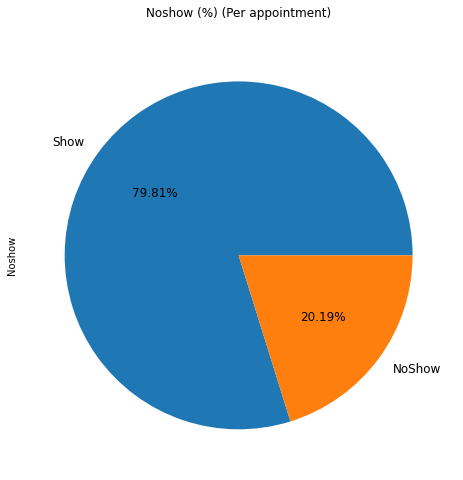

In [99]:
proportions_var(No_show_apt_df, 'Noshow')

From the piechart above, we see that 79.81% showed up for their appointment while the remaining 20.19% did not.

# Question 2.
Proportion of male and female in our dataset

Female    65.0
Male      35.0
Name: Gender, dtype: float64

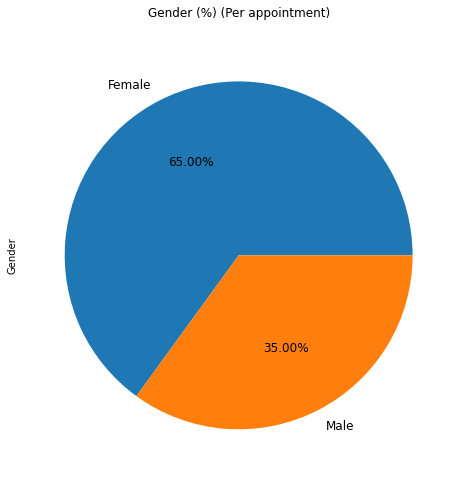

In [100]:
#plot the % distribution of gender based on number of appointment

proportions_var(No_show_apt_df, 'Gender')

From the result displayed in the piechart above, females made a total of 65% of the tal patients while the remaining 35% were male.

## Question 2.2
The ratio of male and female that showed up and those that did not.

,PatientID
Gender,
Female,64.28
Male,35.72


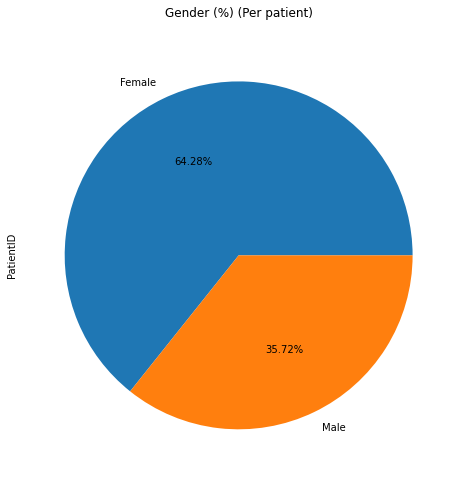

In [101]:
#plot the % distribution based on number of patients

patient_count(No_show_apt_df, 'Gender')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\614670231.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


Noshow,Show,NoShow
Gender,,
Female,79.69,20.31
Male,80.04,19.96


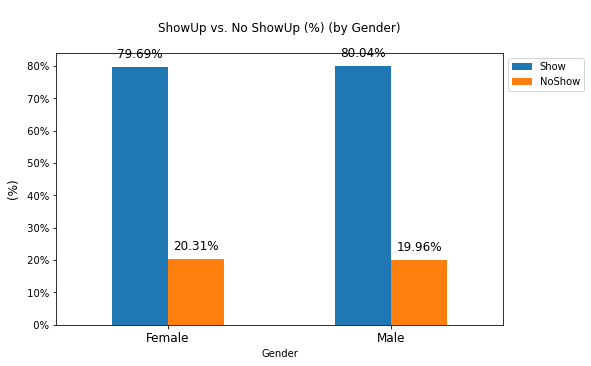

In [102]:
#plot the % of show and noshow based on gender

bar_plot_func(No_show_apt_df, 'Gender')

In all the 65% of female patients, 79.69% of them showed up for their appointment while 20.31% did not.
From the 35% of male patients, 80.04% of them showed up while 19.69% did not show up for their appointment.

# Question 3
The rate of shows and noshows by age.

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: AgeGroup, dtype: float64

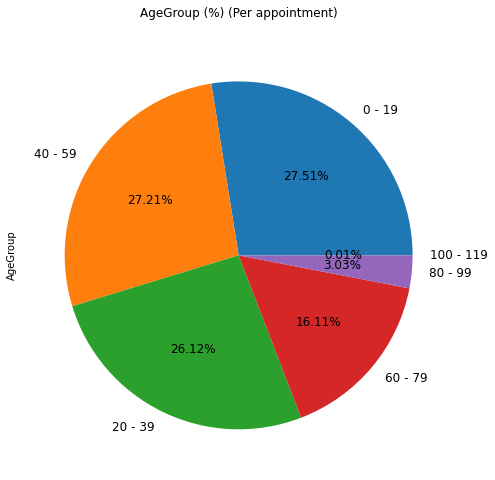

In [103]:
#plot the % of appointment per the age group

proportions_var(No_show_apt_df, 'AgeGroup')

The age group 0-19 had  the most appointment and the age group 100-119 had the least.

,PatientID
AgeGroup,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


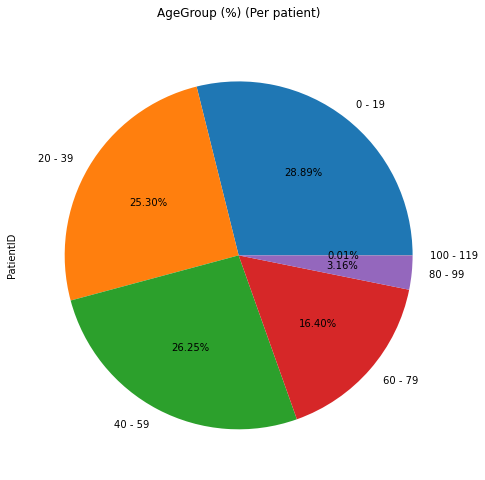

In [104]:
#plot the % of patient count per age group

patient_count(No_show_apt_df, 'AgeGroup')

The age group 0-19 also had the highest number of patients while the age group 100-119 had the least number of patients.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\614670231.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


Noshow,Show,NoShow
AgeGroup,,
0 - 19,77.84,22.16
20 - 39,76.87,23.13
40 - 59,81.19,18.81
60 - 79,84.88,15.12
80 - 99,83.71,16.29
100 - 119,72.73,27.27


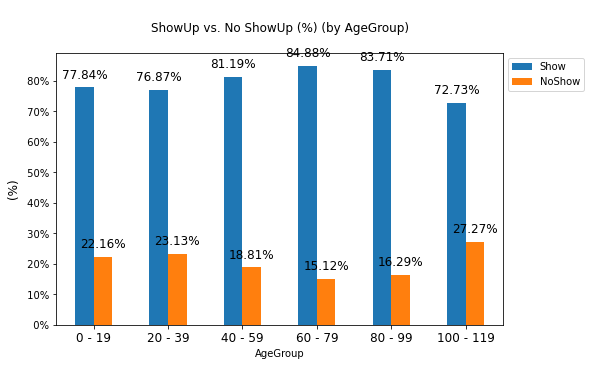

In [105]:
#plot the % of shows and noshow per age group

bar_plot_func(No_show_apt_df, 'AgeGroup')

The age goup 60-79 had the highest show-up rate and the age group 100-119 had the lowest show-up rate,
While the age group 100-119 had highest no-show rate while the age group 60-79 had the lowest no-show rate.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16048\3198606213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])


AgeGroup,0 - 19,20 - 39,40 - 59,60 - 79,80 - 99,100 - 119
Gender,,,,,,
Female,24.60,33.23,26.82,12.82,2.50,0.02
Male,40.79,23.68,22.56,10.63,2.34,0.00


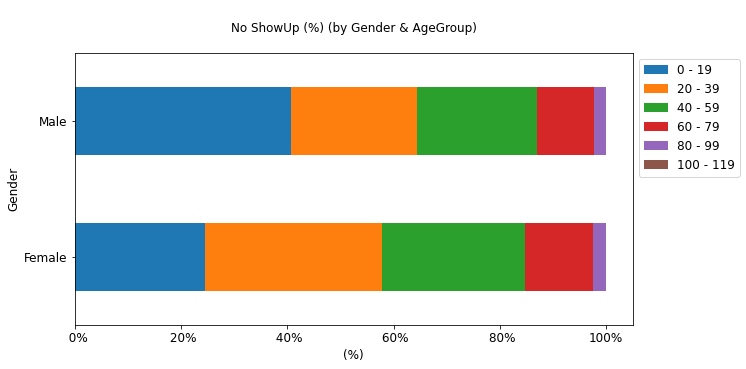

In [106]:
# plot the % NoShowUp % by gender and Age Group

proportions_2Vars(NoShow_df,'Gender' ,'AgeGroup')

33.23% of the '*NoShowUp*' appointments belong to female patients from the age group (20-39yrs);
40.79% of the '*NoShowUp*' appointments belong to male patients from the age group (0-19yrs);


This chart shows a comparison of the distribution of gender and ages.

# 5. Conclusion

The project was a project to investigate the dataset, to make findings , discover trends and relevant information from the data provided. 
Below is a summary of my findings from the analysis.

SUMMARY;

The overall show-up rate is 79.81%

The (%) of female patients is greater than male patients (64.28%, 35.72%)

The largest Age group is (0 - 19) years old with 28.89% while the smallest is (100 - 119) years old with 0.01%

The age group 0-19 had  the most appointment and the age group 100-119 had the least.

The (%) of patients who failed to show up to their appointments is 20.85%

The Show-up rate of male patients is slightly greater than the show-up rate of female patients. (80.04% , 79.69%)

20.31% of females and 19.69% of the males did not show up for their appointment.

The Show-up rate of age group (60 - 79) is the highest with 84.88% where the show-up rate of age group (100 - 119) is the lowest with 72.73%

The age group 100-119 had highest no-show rate while the age group 60-79 had the lowest no-show rate.

# LIMITATIONS

Some data were excluded as the information they portrayed were not clear. The data excluded includes  five negative waiting duration and one negative entry for age.
As most of the columns represent categorical data, and given the type of questions/analysis selected, the visualization charts were mainly (stacked) bar charts, pie charts and Histograms.
